In [1]:
import os
import datetime
# Get current time
current_time = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
# Create output folder with the current time as part of the name
folder_name = f"./Output_{current_time}"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [2]:
# 入力
#input_dis = input("Please enter d in SAPNet===>")
#input_ang = input("Please enter θ in SAPNet===>")

# 出力
Heatmap_path = folder_name + '/heatmap.png'
Network_path = folder_name + '/network.png'
Plotpoint_path = folder_name + '/plotpoint.png'
GIF_path_100 = folder_name + '/graph_100.gif'
GIF_path_1000 = folder_name + '/graph_1000.gif'

In [3]:
import sqlite3

def SQL_SetUp():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データベースファイルが存在する場合は処理を終了
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
    existing_tables = cursor.fetchall()
    if existing_tables:
        print("Database already exists. Exiting setup.")
        conn.close()
        return

    # テーブルを作成
    cursor.execute('''
        CREATE TABLE knowledge (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            angle FLOAT,
            distance FLOAT,
            activation FLOAT DEFAULT 0,
            description TEXT
        )
    ''')

    conn.commit()
    conn.close()

# データベースのセットアップ
SQL_SetUp()


In [4]:
import sqlite3

def SQL_InsertData():
    data = [
        ("直進", 320, 4, 0),#１番の知識
        ("左寄りの直進", 340, 2, 0),#２番の知識
        ("右寄りの直進", 0, 1, 0),#１番の知識
        ("右寄りの直進", 20, 2, 0),#１番の知識
        ("直進", 40, 4, 0)#１番の知識
    ]

    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを挿入
    cursor.executemany("INSERT INTO knowledge (description, angle, distance, activation) VALUES (?, ?, ?, ?)", data)

    conn.commit()
    conn.close()

# データの挿入
SQL_InsertData()

In [5]:
import sqlite3

def SQL_DisplayData():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得して表示
    cursor.execute("SELECT * FROM knowledge")
    rows = cursor.fetchall()
    for row in rows:
        print(row)

    conn.close()

# データの表示
SQL_DisplayData()


(1, 320.0, 4.0, 0.0, '直進')
(2, 340.0, 2.0, 0.0, '左寄りの直進')
(3, 0.0, 1.0, 0.0, '右寄りの直進')
(4, 20.0, 2.0, 0.0, '右寄りの直進')
(5, 40.0, 4.0, 0.0, '直進')


In [ ]:
import sqlite3

def SQL_AddObstacleData(description, angle, distance, activation):
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを挿入
    cursor.execute("INSERT INTO knowledge (description, angle, distance, activation) VALUES (?, ?, ?, ?)",
                   (description, angle, distance, activation))

    conn.commit()
    conn.close()

# データの追加
description = input("説明: ")
angle = float(input("角度: "))
distance = float(input("距離: "))
activation = float(0.0)

SQL_AddObstacleData(description, angle, distance, activation)


In [ ]:
import sqlite3

def SQL_DisplayData():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得して表示
    cursor.execute("SELECT * FROM knowledge")
    rows = cursor.fetchall()
    for row in rows:
        print(row)

    conn.close()

# データの表示
SQL_DisplayData()


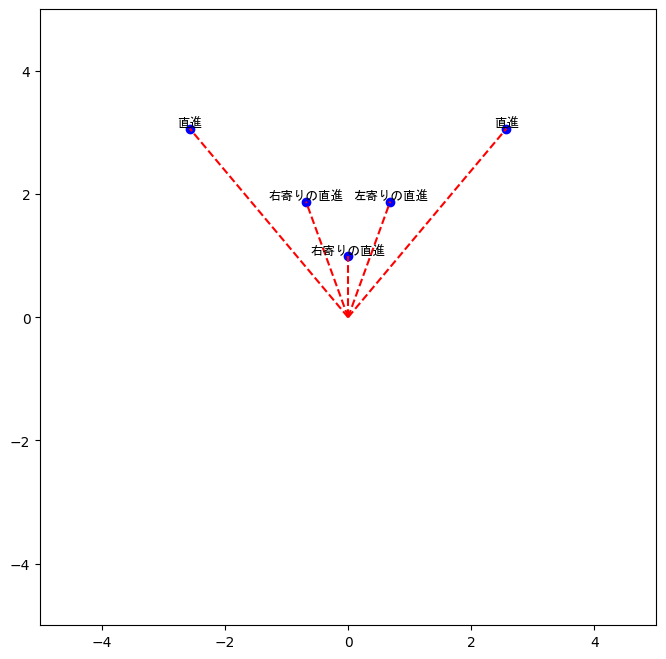

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from matplotlib.font_manager import FontProperties

def plot_points():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得
    cursor.execute("SELECT description, angle, distance FROM knowledge")
    rows = cursor.fetchall()

    conn.close()

    # データを変換
    converted_points = []
    descriptions = []
    for description, angle, distance in rows:
        shifted_angle = angle + 90  # 角度を+90度ずらす
        x = distance * np.cos(np.deg2rad(shifted_angle))
        y = distance * np.sin(np.deg2rad(shifted_angle))
        converted_points.append((x, y))
        descriptions.append(description)

    # 図にプロット
    fig, ax = plt.subplots(figsize=(8, 8))  # グラフのサイズを設定
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # MS Gothicフォントを読み込む
    font_prop = FontProperties(fname=r'C:\Windows\Fonts\msgothic.ttc', size=9)

    # ポイントをプロット
    scatter = ax.scatter(*zip(*converted_points), c='b', marker='o')

    # 中心座標を計算
    center_x, center_y = 0, 0

    # 点と中心を線で結ぶ
    for point, description in zip(converted_points, descriptions):
        x, y = point
        ax.plot([center_x, x], [center_y, y], 'r--')
        ax.text(x, y, description, ha='center', va='bottom', fontproperties=font_prop)

    plt.show()

# データのプロット
plot_points()


ValueError: could not convert string to float: ''

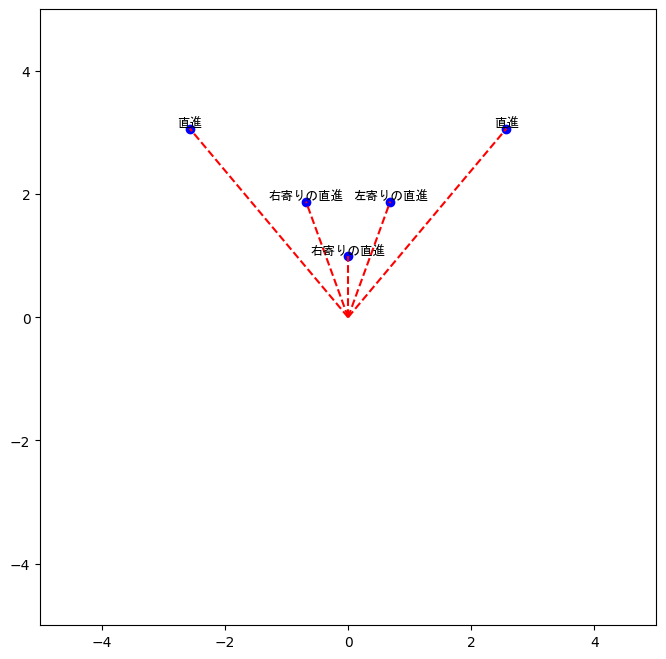

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from matplotlib.font_manager import FontProperties

def plot_points(save):
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得
    cursor.execute("SELECT description, angle, distance FROM knowledge")
    rows = cursor.fetchall()

    conn.close()

    # データを変換
    converted_points = []
    descriptions = []
    for description, angle, distance in rows:
        shifted_angle = angle + 90  # 角度を+90度ずらす
        x = distance * np.cos(np.deg2rad(shifted_angle))
        y = distance * np.sin(np.deg2rad(shifted_angle))
        converted_points.append((x, y))
        descriptions.append(description)

    # 図にプロット
    fig, ax = plt.subplots(figsize=(8, 8))  # グラフのサイズを設定
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # MS Gothicフォントを読み込む
    font_prop = FontProperties(fname=r'C:\Windows\Fonts\msgothic.ttc', size=9)

    # ポイントをプロット
    scatter = ax.scatter(*zip(*converted_points), c='b', marker='o')

    # 中心座標を計算
    center_x, center_y = 0, 0

    # 点と中心を線で結ぶ
    for point, description in zip(converted_points, descriptions):
        x, y = point
        ax.plot([center_x, x], [center_y, y], 'r--')
        ax.text(x, y, description, ha='center', va='bottom', fontproperties=font_prop)

    if(save==1):
        plt.savefig(Plotpoint_path)
    else:
        None
    plt.show()

# データのプロット
plot_points(save=1)


In [9]:
import sqlite3

def SQL_DisplayData():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得して表示
    cursor.execute("SELECT * FROM knowledge")
    rows = cursor.fetchall()
    for row in rows:
        print(row)

    conn.close()

# データの表示
SQL_DisplayData()


(1, 320.0, 4.0, 0.0, '直進')
(2, 340.0, 2.0, 0.0, '左寄りの直進')
(3, 0.0, 1.0, 0.0, '右寄りの直進')
(4, 20.0, 2.0, 0.0, '右寄りの直進')
(5, 40.0, 4.0, 0.0, '直進')


In [10]:
import sqlite3
import pandas as pd

def SQL_GetData():
    conn = sqlite3.connect('database.sqlite')
    cursor = conn.cursor()

    # データを取得してDataFrameに格納
    cursor.execute("SELECT * FROM knowledge")
    rows = cursor.fetchall()
    columns = [description[0] for description in cursor.description]
    df = pd.DataFrame(rows, columns=columns)

    conn.close()

    return df

# データの取得と表示
df = SQL_GetData()
print(df)


   id  angle  distance  activation description
0   1  320.0       4.0         0.0          直進
1   2  340.0       2.0         0.0      左寄りの直進
2   3    0.0       1.0         0.0      右寄りの直進
3   4   20.0       2.0         0.0      右寄りの直進
4   5   40.0       4.0         0.0          直進


In [11]:
import pandas as pd

# idとdescriptionを結合した文字列を作成
df['id_description'] = df['id'].astype(str) + '_' + df['description']

# クロス表を作成
cross_table = pd.crosstab(df['id_description'], df['id_description'])
cross_table = cross_table.replace(1, np.nan)

# 新しいデータフレームを表示
print(cross_table)


id_description  1_直進  2_左寄りの直進  3_右寄りの直進  4_右寄りの直進  5_直進
id_description                                          
1_直進             NaN       0.0       0.0       0.0   0.0
2_左寄りの直進         0.0       NaN       0.0       0.0   0.0
3_右寄りの直進         0.0       0.0       NaN       0.0   0.0
4_右寄りの直進         0.0       0.0       0.0       NaN   0.0
5_直進             0.0       0.0       0.0       0.0   NaN


In [12]:
import pandas as pd
import numpy as np

#ベクトルとして角度と距離を使用するため、データを準備
vectors = df[['angle', 'distance']]

#ベクトル間のユークリッド距離を計算
distances = np.linalg.norm(vectors.values[:, np.newaxis] - vectors.values, axis=2)

#クロス表に距離を格納
cross_table = pd.DataFrame(distances, index=df['id_description'], columns=df['id_description'])
cross_table = cross_table.replace(0, np.nan)

#新しいデータフレームを表示
print(cross_table)

id_description        1_直進    2_左寄りの直進    3_右寄りの直進    4_右寄りの直進        5_直進
id_description                                                            
1_直進                   NaN   20.099751  320.014062  300.006667  280.000000
2_左寄りの直進         20.099751         NaN  340.001471  320.000000  300.006667
3_右寄りの直進        320.014062  340.001471         NaN   20.024984   40.112342
4_右寄りの直進        300.006667  320.000000   20.024984         NaN   20.099751
5_直進            280.000000  300.006667   40.112342   20.099751         NaN


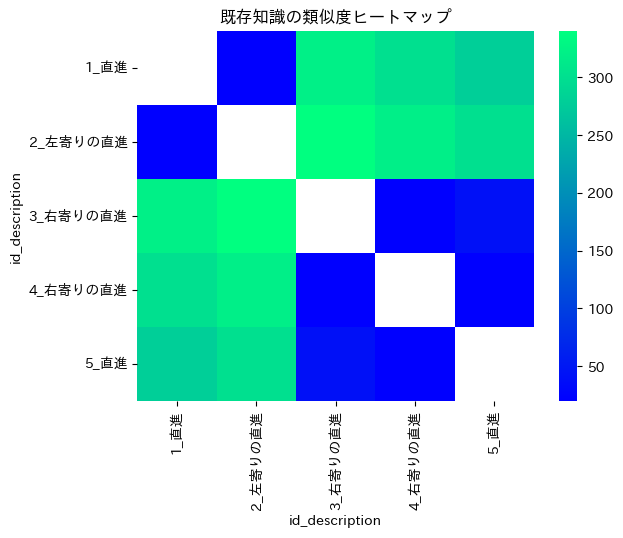

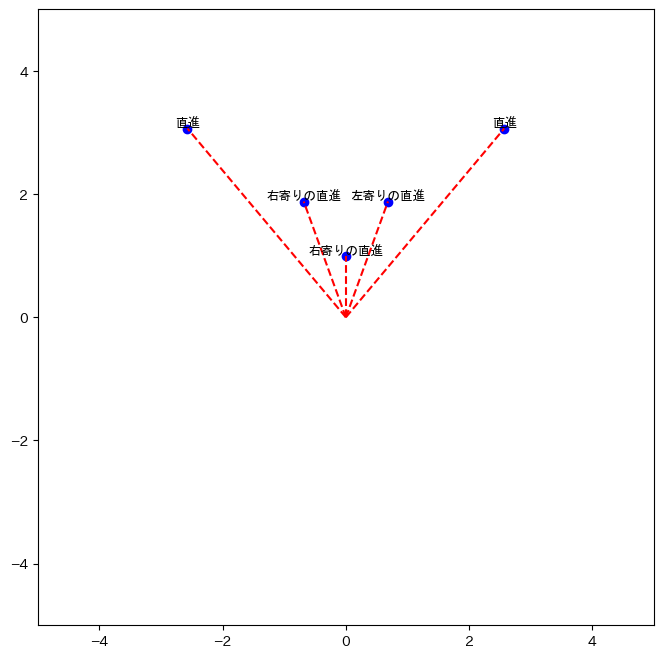

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib


plt.figure()
plt.title("既存知識の類似度ヒートマップ")
sns.heatmap(cross_table,cmap="winter")
plt.savefig(Heatmap_path)
plot_points(save=0)


In [14]:
import numpy as np

# ユークリッド距離を評価する指標を計算する関数
def evaluate_distance(distance):
    max_distance = np.nanmax(cross_table.values)  # ユークリッド距離の最大値（NaNを除く）
    scaled_distance = distance / max_distance  # ユークリッド距離を最大値でスケーリング
    evaluation = 1 - scaled_distance  # 1からスケーリングされた距離を引く
    return evaluation

# ユークリッド距離の評価指標を計算し、再度DataFrameに格納
evaluated_values = cross_table.applymap(evaluate_distance)
activation_table = evaluated_values.copy()

# 再度dfを表示
print(activation_table)


id_description      1_直進  2_左寄りの直進  3_右寄りの直進  4_右寄りの直進      5_直進
id_description                                                  
1_直進                 NaN  0.940883  0.058786  0.117631  0.176474
2_左寄りの直進        0.940883       NaN  0.000000  0.058828  0.117631
3_右寄りの直進        0.058786  0.000000       NaN  0.941103  0.882023
4_右寄りの直進        0.117631  0.058828  0.941103       NaN  0.940883
5_直進            0.176474  0.117631  0.882023  0.940883       NaN


In [15]:
import numpy as np

# ユークリッド距離を評価する指標を計算する関数
def evaluate_distance(distance):
    max_distance = np.nanmax(cross_table.values)  # ユークリッド距離の最大値（NaNを除く）
    scaled_distance = distance / max_distance  # ユークリッド距離を最大値でスケーリング
    evaluation = 1 - scaled_distance  # 1からスケーリングされた距離を引く
    return evaluation

# ユークリッド距離の評価指標を計算し、再度DataFrameに格納
evaluated_values = cross_table.applymap(evaluate_distance)
activation_table = evaluated_values.copy()

# 評価指標を1/10にスケーリング
activation_table_div10 = activation_table / 10
activation_table_min1 = 1-activation_table


# 再度activation_tableを表示
print(activation_table_div10)


id_description      1_直進  2_左寄りの直進  3_右寄りの直進  4_右寄りの直進      5_直進
id_description                                                  
1_直進                 NaN  0.094088  0.005879  0.011763  0.017647
2_左寄りの直進        0.094088       NaN  0.000000  0.005883  0.011763
3_右寄りの直進        0.005879  0.000000       NaN  0.094110  0.088202
4_右寄りの直進        0.011763  0.005883  0.094110       NaN  0.094088
5_直進            0.017647  0.011763  0.088202  0.094088       NaN


TypeError: plot_points() missing 1 required positional argument: 'save'

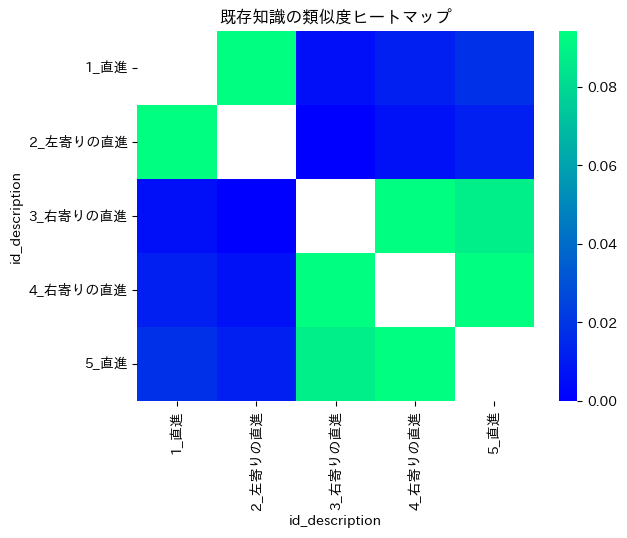

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib


plt.figure()
plt.title("既存知識の類似度ヒートマップ")
sns.heatmap(activation_table_div10,cmap="winter")
plt.savefig(Heatmap_path)
plot_points()


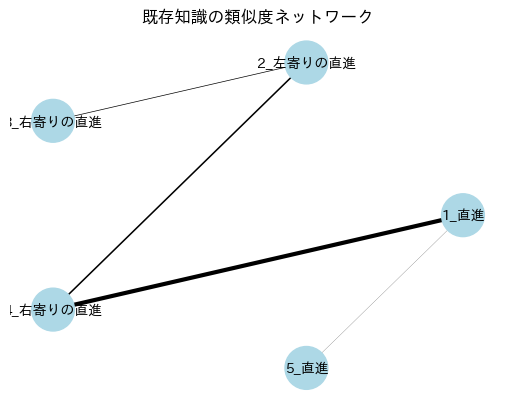

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib

G = nx.from_pandas_adjacency(activation_table_min1, create_using=nx.Graph)

# グラフの描画
pos = nx.circular_layout(G)  # レイアウトアルゴリズムをcircular_layoutに変更
weights = nx.get_edge_attributes(G, 'weight')

# エッジの太さを制限
max_weight = max(weights.values())
edge_widths = [(6 * (1 - weights[edge])) ** 2 for edge in G.edges()]
# エッジの太さの最大値を制限
max_edge_width = 3.0
edge_widths = [min(width, max_edge_width) for width in edge_widths]

# ノードの太さを制限
node_sizes = [50 + 150 * G.degree(node) for node in G.nodes()]
# ノードのサイズの最大値を制限
max_node_size = 1000
node_sizes = [min(size, max_node_size) for size in node_sizes]

# グラフを描画
japanize_matplotlib.japanize()
# 一部のエッジのみ描画
edges_to_draw = [(u, v) for (u, v) in G.edges if weights[(u, v)] > 0.5]
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, edgelist=edges_to_draw, width=edge_widths, edge_color='black')
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_color='black', font_size=10)
plt.title("既存知識の類似度ネットワーク")
plt.axis('off')

# グラフを出力
plt.savefig(Network_path)
plt.show()  # グラフを表示するための追加行


In [ ]:
# 入力
input_dis = input("Please enter d in SAPNet===>")
input_ang = input("Please enter θ in SAPNet===>")